<a href="https://colab.research.google.com/github/18k-481/capstone_project/blob/main/Capstone_Ai.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
from sklearn.metrics import confusion_matrix, f1_score, precision_score, recall_score


In [ ]:
# Load dataset from csv using pandas
dataset = pd.read_csv('/content/hypothyroidsm.csv')
dataset.head()

,Unnamed: 0,Age,Sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG
0,hypothyroid,72,M,f,f,f,f,f,f,f,f,f,f,f,y,30,y,0.6,y,15,y,1.48,y,10,n,?
1,hypothyroid,15,F,t,f,f,f,f,f,f,f,f,f,f,y,145,y,1.7,y,19,y,1.13,y,17,n,?
2,hypothyroid,24,M,f,f,f,f,f,f,f,f,f,f,f,y,0,y,0.2,y,4,y,1,y,0,n,?
3,hypothyroid,24,F,f,f,f,f,f,f,f,f,f,f,f,y,430,y,0.4,y,6,y,1.04,y,6,n,?
4,hypothyroid,77,M,f,f,f,f,f,f,f,f,f,f,f,y,7.3,y,1.2,y,57,y,1.28,y,44,n,?


In [ ]:
# Renaming the first column as target
dataset = dataset.rename(columns = {dataset.columns[0]:"target"})

In [ ]:
#mapping the value "hypothyroid" as '1' and "negative" as '0'
dataset["target"] = dataset["target"].map({"negative":0,"hypothyroid":1})

In [ ]:
# Replacing the categorical values into binary values
dataset = dataset.replace({'f':0,'t':1, 'y':1, 'n':0, 'M':0, 'F':1})

In [ ]:
# Displaying the head of the dataset
dataset.head()

,target,Age,Sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG
0,1,72,0,0,0,0,0,0,0,0,0,0,0,0,1,30,1,0.6,1,15,1,1.48,1,10,0,?
1,1,15,1,1,0,0,0,0,0,0,0,0,0,0,1,145,1,1.7,1,19,1,1.13,1,17,0,?
2,1,24,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0.2,1,4,1,1,1,0,0,?
3,1,24,1,0,0,0,0,0,0,0,0,0,0,0,1,430,1,0.4,1,6,1,1.04,1,6,0,?
4,1,77,0,0,0,0,0,0,0,0,0,0,0,0,1,7.3,1,1.2,1,57,1,1.28,1,44,0,?


In [ ]:
# Replacing ? into NaN values 
dataset.replace(to_replace='?', inplace=True, value=np.NaN)

In [ ]:
# Count the number of null values
dataset.isnull().sum()

target                          0
Age                           446
Sex                            73
on_thyroxine                    0
query_on_thyroxine              0
on_antithyroid_medication       0
thyroid_surgery                 0
query_hypothyroid               0
query_hyperthyroid              0
pregnant                        0
sick                            0
tumor                           0
lithium                         0
goitre                          0
TSH_measured                    0
TSH                           468
T3_measured                     0
T3                            695
TT4_measured                    0
TT4                           249
T4U_measured                    0
T4U                           248
FTI_measured                    0
FTI                           247
TBG_measured                    0
TBG                          2903
dtype: int64

In [ ]:
# Dropping the TBG column as it contains extremely high number of null values
dataset.drop('TBG', axis = 1, inplace=True)

In [ ]:
# Selecting columns with data type as 'object'
columns = dataset.columns[dataset.dtypes.eq('object')]

# Convert to numeric values
dataset[columns] = dataset[columns].apply(pd.to_numeric, errors='coerce')

In [ ]:
# Viewing the details
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3163 entries, 0 to 3162
Data columns (total 25 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   target                     3163 non-null   int64  
 1   Age                        2717 non-null   float64
 2   Sex                        3090 non-null   float64
 3   on_thyroxine               3163 non-null   int64  
 4   query_on_thyroxine         3163 non-null   int64  
 5   on_antithyroid_medication  3163 non-null   int64  
 6   thyroid_surgery            3163 non-null   int64  
 7   query_hypothyroid          3163 non-null   int64  
 8   query_hyperthyroid         3163 non-null   int64  
 9   pregnant                   3163 non-null   int64  
 10  sick                       3163 non-null   int64  
 11  tumor                      3163 non-null   int64  
 12  lithium                    3163 non-null   int64  
 13  goitre                     3163 non-null   int64

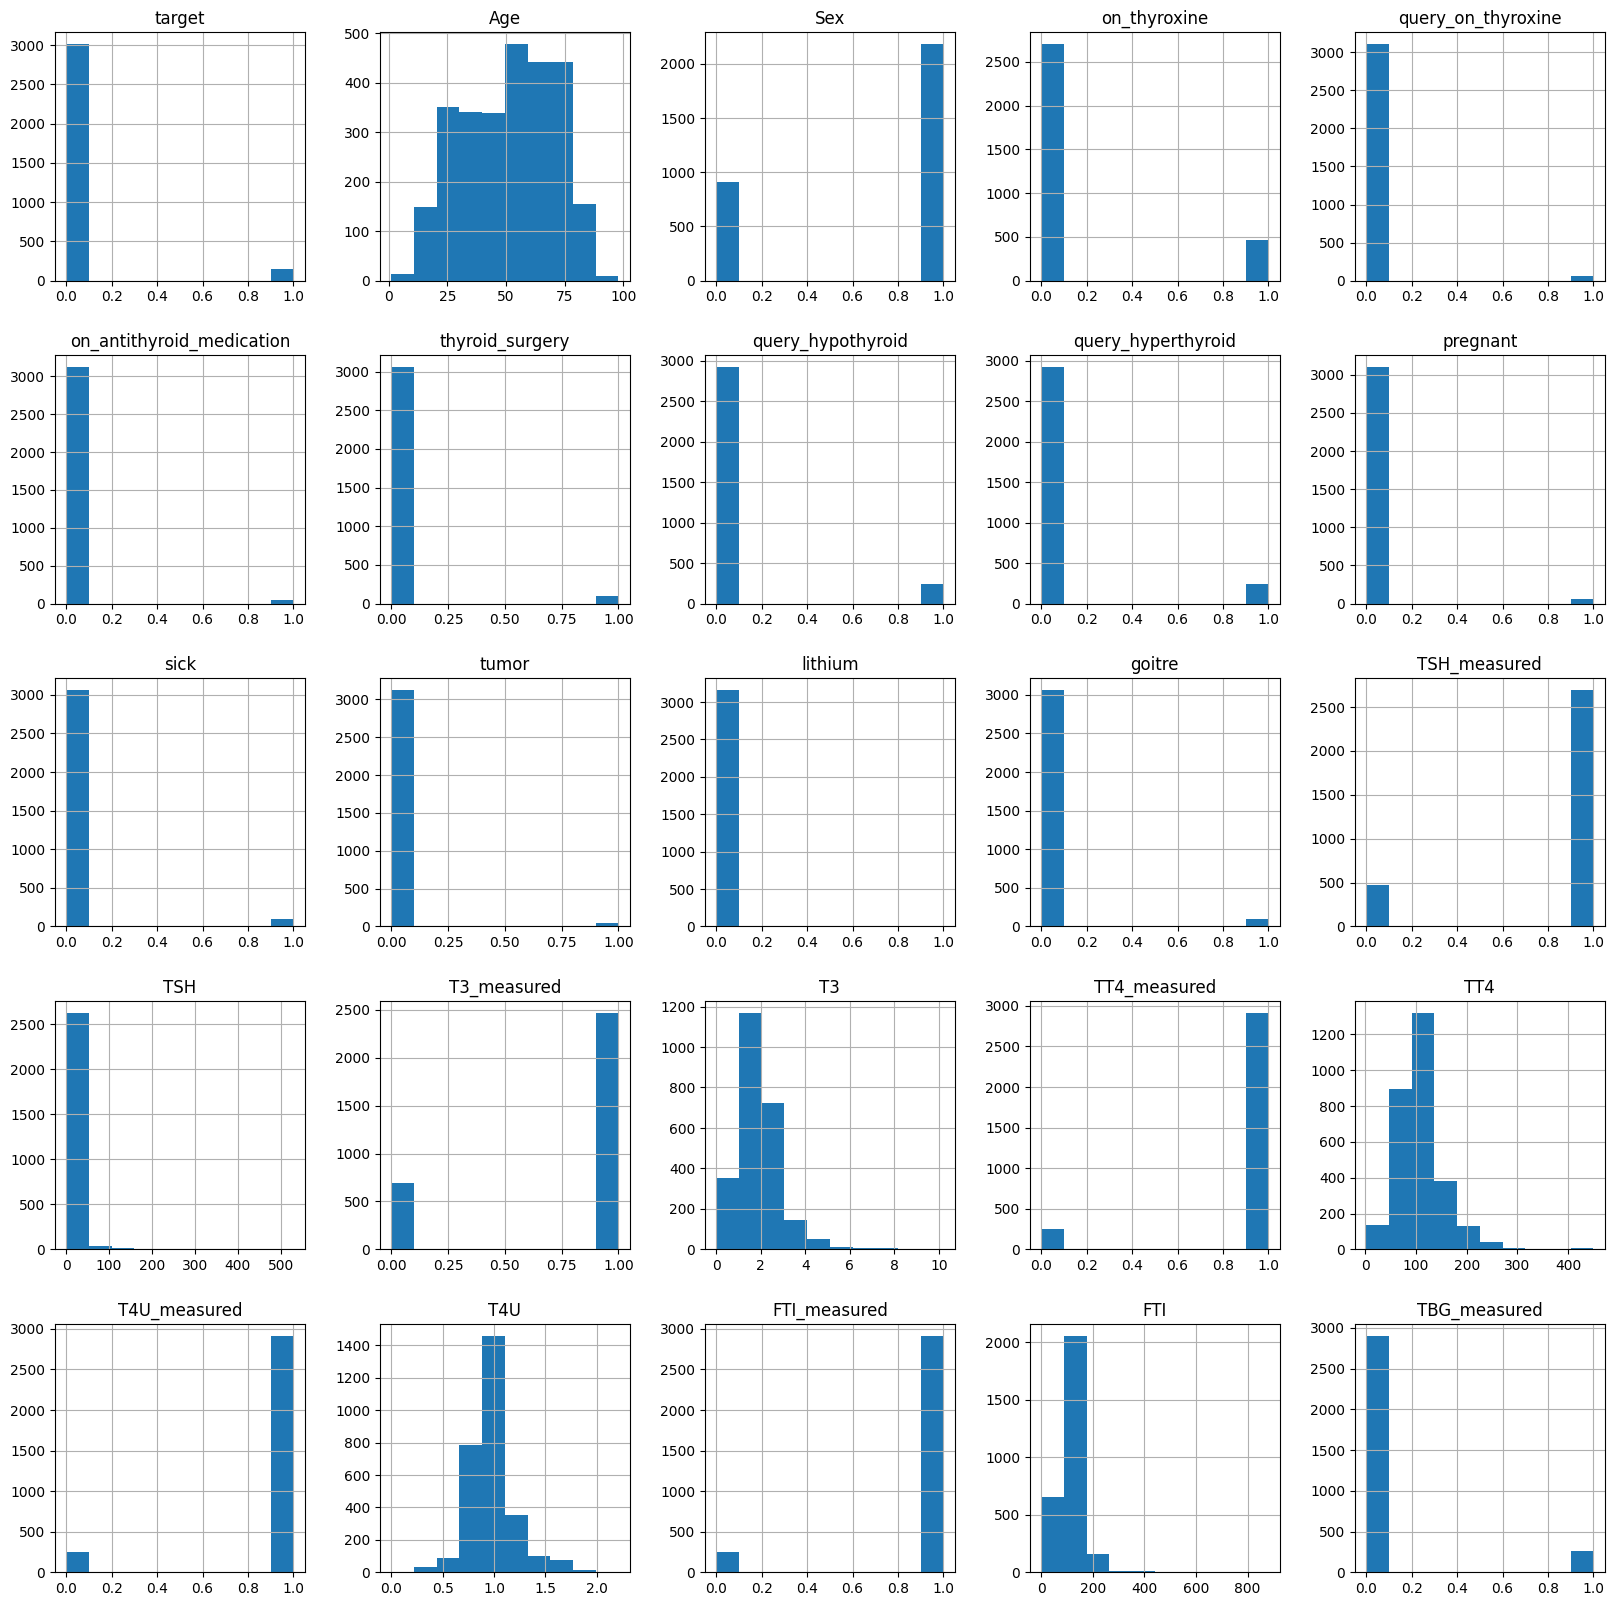

In [ ]:
dataset.hist(figsize = (20,20));

In [ ]:
# List of columns containing null values
dataset.columns[dataset.isnull().any()].tolist() 

['Age', 'Sex', 'TSH', 'T3', 'TT4', 'T4U', 'FTI']

**Based on the statistics plotted above, we can see that,**

- The features "Age" and "T4U" show a normal distribution, which is why we will be replacing the missing values with mean.
- The features "TSH", "T3", "TT4" and "FTI" show a skewed distribution, which is why we will be replacing the missing values with median.
- The feature "gender" is binary and contains an imbalanced data with the values "1" much greater then "0". So we will be replacing the missing values with "0".

In [ ]:
# Replacing null values by mean 
dataset['Age'].fillna(dataset['Age'].mean(), inplace = True)
dataset['T4U'].fillna(dataset['T4U'].mean(), inplace = True)

# Replacing null values by median
dataset['TSH'].fillna(dataset['TSH'].mean(), inplace = True)
dataset['T3'].fillna(dataset['T3'].median(), inplace = True)
dataset['TT4'].fillna(dataset['TT4'].median(), inplace = True)
dataset['FTI'].fillna(dataset['FTI'].median(), inplace = True)

# The gender data looks to be imbalanced with 0 lesser than 1
# Replacing null values with 0
dataset['Sex'].fillna(0, inplace = True)

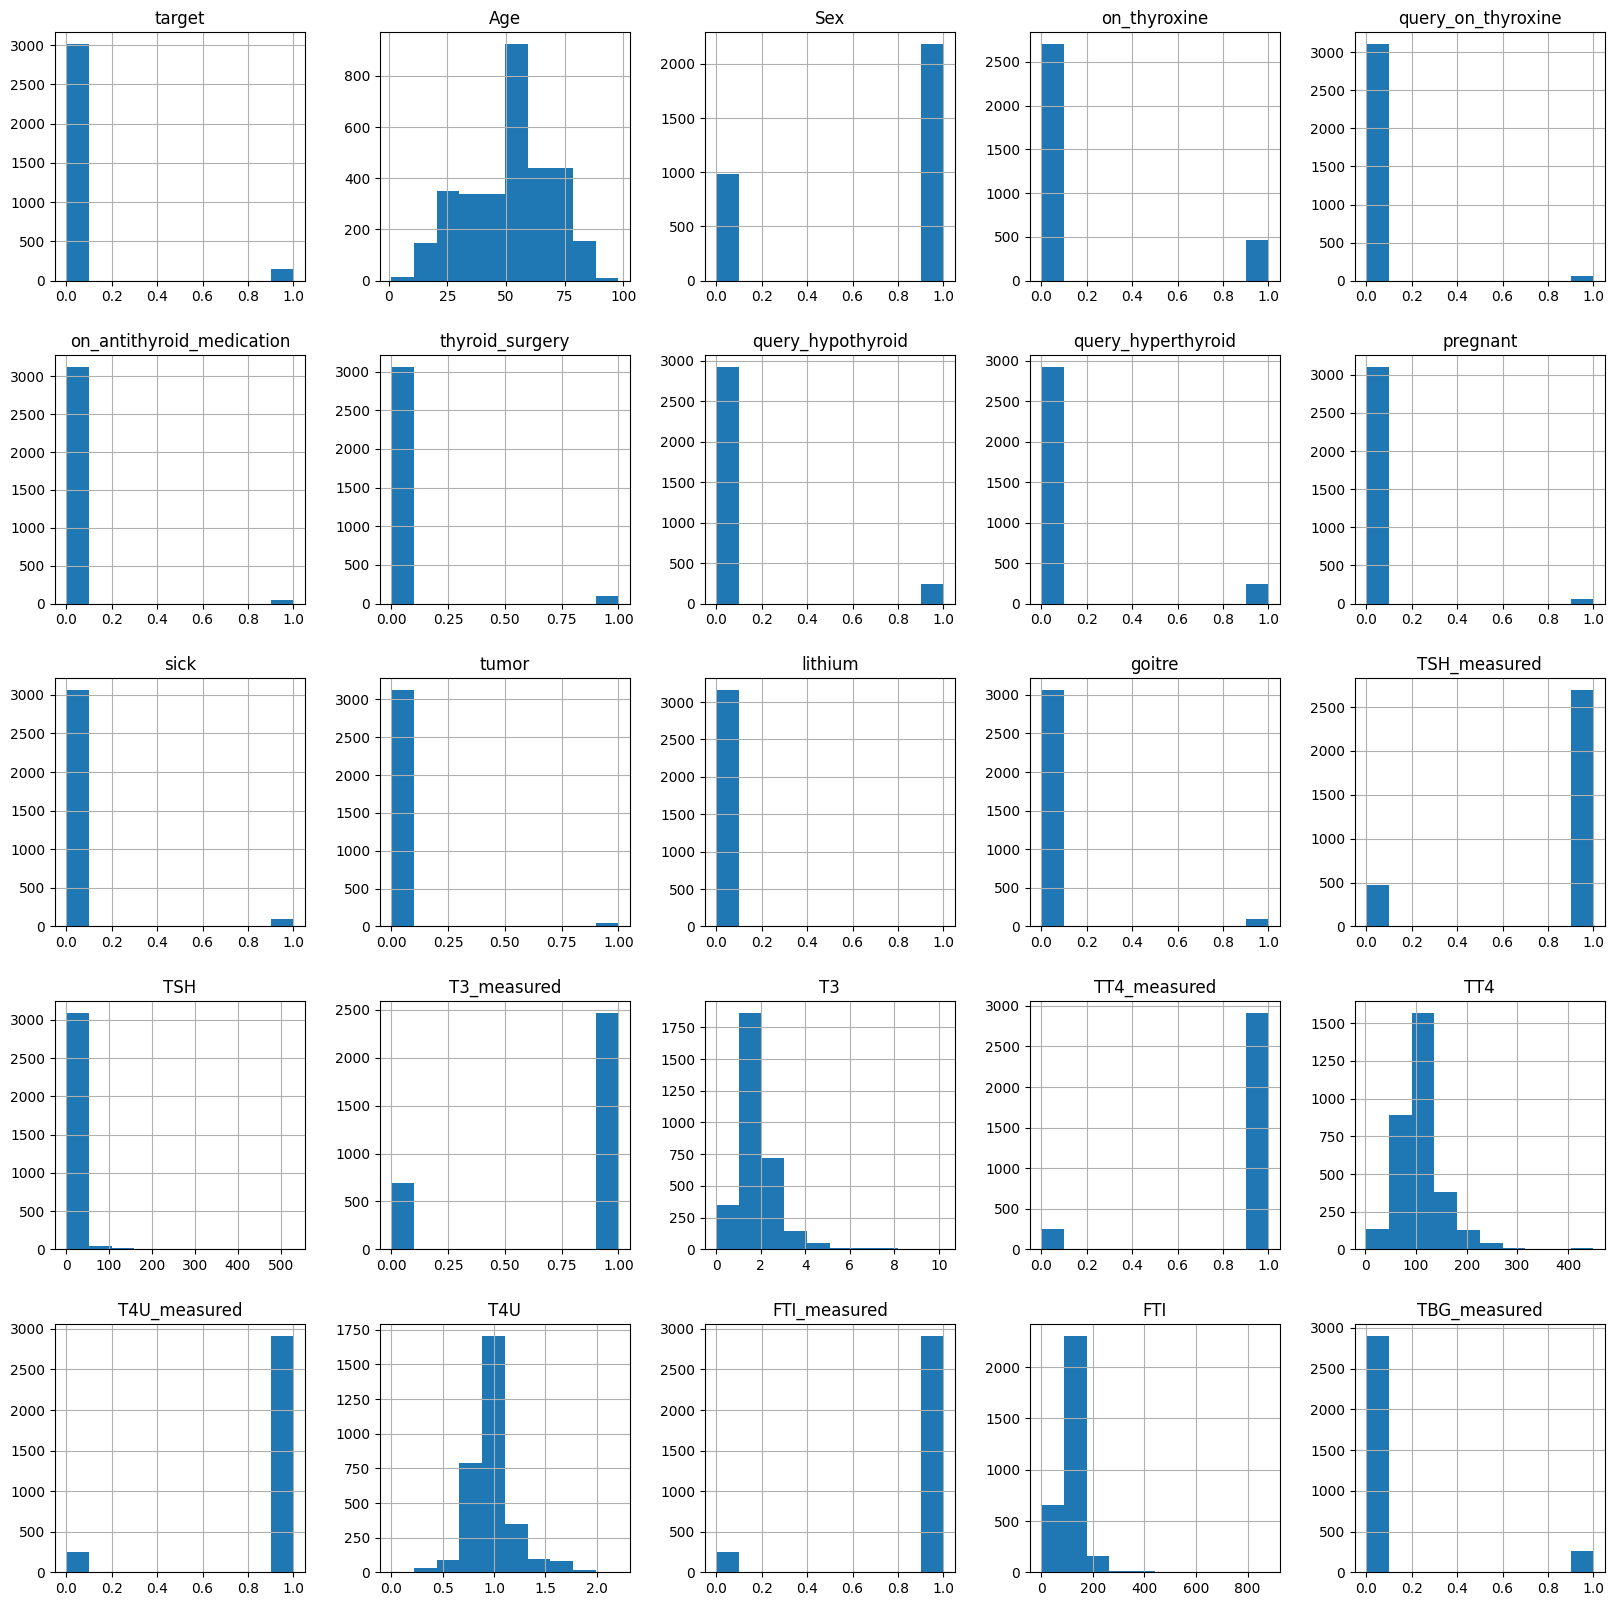

In [ ]:
# Plot the histogram of different features
plot_cleaned = dataset.hist(figsize = (20,20))

In [ ]:
# Check for the number of null values
dataset.isnull().sum()

target                       0
Age                          0
Sex                          0
on_thyroxine                 0
query_on_thyroxine           0
on_antithyroid_medication    0
thyroid_surgery              0
query_hypothyroid            0
query_hyperthyroid           0
pregnant                     0
sick                         0
tumor                        0
lithium                      0
goitre                       0
TSH_measured                 0
TSH                          0
T3_measured                  0
T3                           0
TT4_measured                 0
TT4                          0
T4U_measured                 0
T4U                          0
FTI_measured                 0
FTI                          0
TBG_measured                 0
dtype: int64

In [ ]:
# Features
X = dataset.drop('target', axis = 1) # selecting all columns except the target
# Target variable
y = dataset['target']

In [ ]:
print(X.shape, y.shape)

(3163, 24) (3163,)


In [ ]:
from sklearn.model_selection import train_test_split

# Split the data into train-80% and test-20%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.preprocessing import StandardScaler

# Initialization of the class
scaler = StandardScaler()

# Applying the scaler on test and train data
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Building the model using 'keras'


In [ ]:
# For building our model
import keras
from keras.models import Sequential
from keras.layers import Dense
# Input
model = Sequential()
# Hidden layer
model.add(Dense(64, kernel_initializer='uniform', input_dim=24, activation='relu'))
# Output layer
model.add(Dense(1, kernel_initializer='uniform', activation='sigmoid'))

In [ ]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
# Training the model
result = model.fit(X_train, y_train, epochs=100, validation_split=0.2, batch_size=40,  verbose=2)

Epoch 1/100
51/51 - 1s - loss: 0.5929 - accuracy: 0.9422 - val_loss: 0.4563 - val_accuracy: 0.9625
Epoch 2/100
51/51 - 0s - loss: 0.3147 - accuracy: 0.9565 - val_loss: 0.1816 - val_accuracy: 0.9644
Epoch 3/100
51/51 - 0s - loss: 0.1423 - accuracy: 0.9644 - val_loss: 0.0976 - val_accuracy: 0.9723
Epoch 4/100
51/51 - 0s - loss: 0.0931 - accuracy: 0.9708 - val_loss: 0.0716 - val_accuracy: 0.9802
Epoch 5/100
51/51 - 0s - loss: 0.0735 - accuracy: 0.9743 - val_loss: 0.0593 - val_accuracy: 0.9822
Epoch 6/100
51/51 - 0s - loss: 0.0636 - accuracy: 0.9768 - val_loss: 0.0533 - val_accuracy: 0.9842
Epoch 7/100
51/51 - 0s - loss: 0.0575 - accuracy: 0.9792 - val_loss: 0.0496 - val_accuracy: 0.9822
Epoch 8/100
51/51 - 0s - loss: 0.0539 - accuracy: 0.9802 - val_loss: 0.0470 - val_accuracy: 0.9822
Epoch 9/100
51/51 - 0s - loss: 0.0516 - accuracy: 0.9802 - val_loss: 0.0454 - val_accuracy: 0.9822
Epoch 10/100
51/51 - 0s - loss: 0.0492 - accuracy: 0.9817 - val_loss: 0.0438 - val_accuracy: 0.9822
Epoch 11/

In [ ]:
# Get the loss and accuracy of the model by evaluation
loss, acc = model.evaluate(X_test, y_test)
ac1=acc*100
# Print the loss and accuracy score for the model
print("%s: %.2f%%" % (model.metrics_names[0], loss*100))
print("%s: %.2f%%" % (model.metrics_names[1], acc*100))

20/20 [==============================] - 0s 1ms/step - loss: 0.0658 - accuracy: 0.9826
loss: 6.58%
accuracy: 98.26%


In [ ]:
# Predicting the output predictions
y_pred = model.predict(X_test).round()

In [ ]:
# Calculating the F1 score, recall, and precision
print("%s: %.2f%%" % ("F1-score", f1_score(y_test, y_pred)*100))
print("%s: %.2f%%" % ("Recall", recall_score(y_test, y_pred)*100))
print("%s: %.2f%%" % ("Precision", precision_score(y_test, y_pred)*100))

F1-score: 84.06%
Recall: 78.38%
Precision: 90.62%


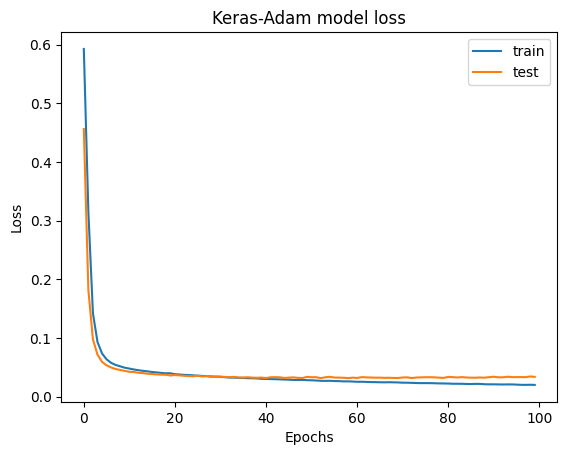

In [ ]:
# summarize the result and plot the training and test loss
plt.plot(result.history['loss'])
plt.plot(result.history['val_loss'])

# Set the parameters
plt.title('Keras-Adam model loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'test'], loc='upper right')

# Display the plots
plt.show()

**KNN Algorithm**

In [ ]:
#Building model using knn
from sklearn.neighbors import KNeighborsClassifier
kn=KNeighborsClassifier(n_neighbors=5, metric='euclidean',p=2)
kn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [ ]:
y_pred=kn.predict(X_test)
#y_pred

In [ ]:
from sklearn.metrics import confusion_matrix
c=confusion_matrix(y_test,y_pred)
c

array([[595,   1],
       [ 15,  22]])

In [ ]:
from sklearn.metrics import accuracy_score
acc=accuracy_score(y_test, y_pred)
acu=acc*100
acu

97.47235387045814

In [ ]:
print("%s: %.2f%%" % ("F1-score", f1_score(y_test, y_pred)*100))
print("%s: %.2f%%" % ("Recall", recall_score(y_test, y_pred)*100))
print("%s: %.2f%%" % ("Precision", precision_score(y_test, y_pred)*100))

F1-score: 73.33%
Recall: 59.46%
Precision: 95.65%


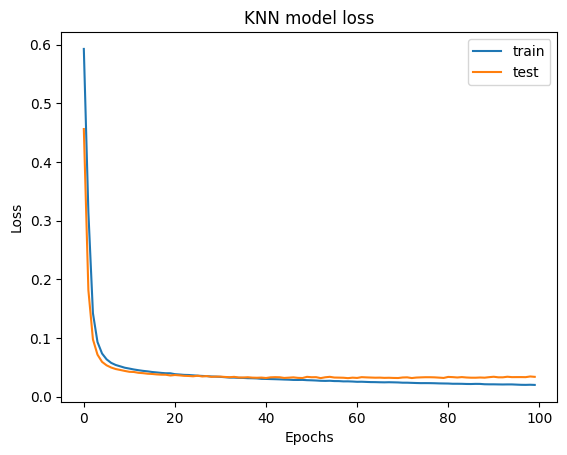

In [ ]:
# summarize the result and plot the training and test loss
plt.plot(result.history['loss'])
plt.plot(result.history['val_loss'])

# Set the parameters
plt.title('KNN model loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'test'], loc='upper right')

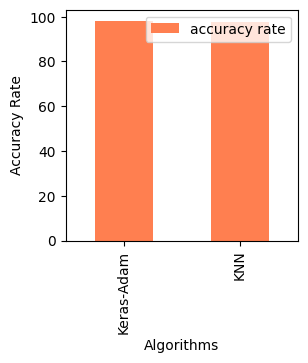

dict_items([('Keras-Adam', 98.26224446296692), ('KNN', 97.47235387045814)])


In [ ]:
graph={"Keras-Adam":ac1,"KNN":acu}
df=pd.DataFrame(graph.items(), columns=['Model','accuracy rate'])
df.plot(kind='bar', color='coral',figsize=(3,3))
plt.xlabel('Algorithms')
plt.xticks([0,1],["Keras-Adam",'KNN',"," ])
plt.ylabel('Accuracy Rate')
plt.style.use('default')
plt.show()
print(graph.items())